In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
articles_good = pd.read_csv("data/ainur/article_good.csv")
articles_nsgood = pd.read_csv("data/ainur/article_bad.csv")

In [11]:
type(articles_good)

pandas.core.frame.DataFrame

In [13]:
articles_good.head()

,Unnamed: 0,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [221]:
articles_good.groupby('Article').agg('user').unique().head()

Article
4chan                              [Certes, 2600:8801:983:7000:21D4:4DD3:80E2:3E6...
AACS encryption key controversy    [2409:4062:209D:1376:A498:A3DA:38DA:55E9, Aoi,...
AVG PC TuneUp                      [Certes, 2405:205:3202:4746:B8B7:A4C9:4E96:F74...
Acid2                              [ClueBot NG, 190.43.57.117, 125.63.26.99, Just...
Alan Kotok                         [Plaba123, 99.85.40.29, Certes, ClueBot NG, Ma...
Name: user, dtype: object

# Aspect 1: Total number of unique editors

### My Hypothesis: 

**Good** articles have more diverse numbers of unique editors than the **not-so-good** articles

In [47]:
pd.DataFrame(articles_good.groupby('Article').agg('user').unique()).head()

,user
Article,
4chan,"[Certes, 2600:8801:983:7000:21D4:4DD3:80E2:3E6..."
AACS encryption key controversy,"[2409:4062:209D:1376:A498:A3DA:38DA:55E9, Aoi,..."
AVG PC TuneUp,"[Certes, 2405:205:3202:4746:B8B7:A4C9:4E96:F74..."
Acid2,"[ClueBot NG, 190.43.57.117, 125.63.26.99, Just..."
Alan Kotok,"[Plaba123, 99.85.40.29, Certes, ClueBot NG, Ma..."


In [57]:
series_n_contributer = articles_good.groupby('Article').agg({'user': ['nunique']})
series_n_contributer.describe()

,user
,nunique
count,152.000000
mean,148.223684
std,376.060623
min,4.000000
25%,13.000000
50%,46.000000
75%,99.000000
max,2817.000000


## Find outliners

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029EF6C9FE80>]],
      dtype=object)

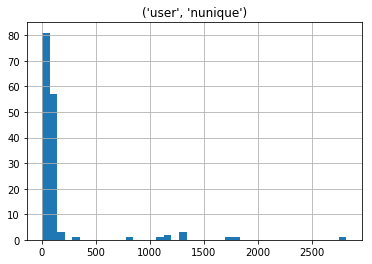

In [78]:
series_n_contributer.hist(bins=40)

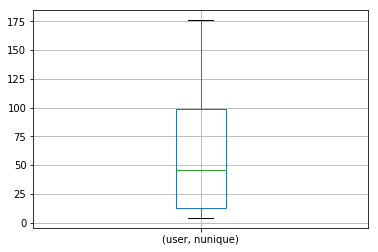

In [95]:
series_n_contributer.boxplot(showfliers=False)

In [222]:
# By looking at the boxplot, we treat n_contributer over 175 as outliners:

In [100]:
task1_good = pd.Series(articles_good.groupby('Article').agg('user').describe()['unique'])
outliners = task1_good[ task1_good>250 ]
print(outliners)
outliners.describe()

# articles_good.groupby('Article').agg('user').describe()['unique'].sort_values()[::-1].head(15)

Article
4chan                                    1167
Acid2                                     779
Delrina                                  1294
Folding@home                             1332
Macintosh Classic                        1060
Manchester Baby                          2817
Manchester Mark 1                        1283
Microsoft Security Essentials            1197
NeXT                                     1727
Parallel computing                       1824
Rise of Nations: Thrones and Patriots     291
Name: unique, dtype: object


count       11
unique      11
top       1167
freq         1
Name: unique, dtype: int64

In [217]:
# Let's compare with the not-so-good one

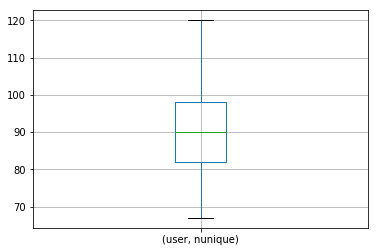

In [224]:
s_nsgood = articles_nsgood.groupby('Article').agg({'user': ['nunique']})
s_nsgood.boxplot(showfliers=False)

In [ ]:
# By looking at the boxplot, we treat n_contributer of not-so-good articles over 120 as outliners:

In [225]:
task1_nsgood = pd.Series(articles_nsgood.groupby('Article').agg('user').describe()['unique'])
outliners = task1_good[ task1_good>120 ]
print(outliners)
outliners.describe()

Article
4chan                                       1167
Acid2                                        779
Delrina                                     1294
Eugene Kaspersky                             139
Folding@home                                1332
Fortinet                                     144
Heartbleed                                   157
History of computing in the Soviet Union     161
ILoo                                         122
Integer sorting                              125
JMP (statistical software)                   128
Jeremy Stoppelman                            123
Macintosh Classic                           1060
Manchester Baby                             2817
Manchester Mark 1                           1283
Microsoft Security Essentials               1197
Mya (program)                                125
NeXT                                        1727
Nimrod (computing)                           135
Parallel computing                          1824
Paxata      

count      27
unique     25
top       125
freq        2
Name: unique, dtype: int64

In [227]:
# Compare the boxplots together

{'whiskers': [<matplotlib.lines.Line2D at 0x29ef9ac8a20>,
 'caps': [<matplotlib.lines.Line2D at 0x29ef9ac8c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ef9ac8710>,
 'medians': [<matplotlib.lines.Line2D at 0x29ef9af2358>,
 'fliers': [],
 'means': []}

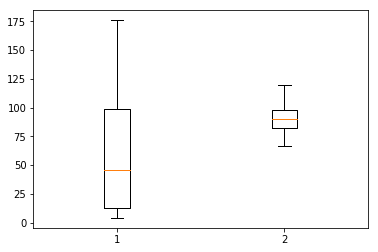

In [234]:
g = pd.Series(articles_good.groupby('Article').agg('user').describe()['unique'])
nsg = pd.Series(articles_nsgood.groupby('Article').agg('user').describe()['unique'])
plt.boxplot([g, nsg], showfliers=False)

This concludes that my hypothesis that **Good** articles have more diverse numbers of unique editors than the **not-so-good** articles 

# Aspect 2: Number of edits per editors

### My Hypothesis: 

**Good** articles have higher numbers of edits per editors than the **not-so-good** articles

    The editors comes back frequently to improve the articles and thus makes the article better.
    


# Aspect 5: Frequency of edits (time between edits)

### My Hypothesis: 

**Good** articles have lower frequency of edits than the **not-so-good** articles

In [238]:
task5_good = pd.DataFrame(articles_good.groupby('Article').agg('timestamp').unique())
task5_good_m = articles_good.groupby('Article').agg({'user': ['nunique']})
task5_good.head()

,timestamp
Article,
4chan,"[2018-11-18T11:21:12Z, 2018-11-18T06:09:03Z, 2..."
AACS encryption key controversy,"[2018-06-24T18:20:28Z, 2018-04-16T22:03:13Z, 2..."
AVG PC TuneUp,"[2017-11-10T11:47:34Z, 2017-11-10T10:01:50Z, 2..."
Acid2,"[2018-11-14T21:54:02Z, 2018-11-14T21:54:00Z, 2..."
Alan Kotok,"[2018-10-20T02:26:38Z, 2018-10-20T02:26:28Z, 2..."


In [195]:
one_article = task5_good.loc['4chan']
one_article.loc['timestamp']
time_series = pd.Series([pd.Timestamp(i) for i in one_article.loc['timestamp']])
time_series = time_series.sort_values()
time_series.diff().mean()

Timedelta('2 days 20:06:20.697937')

In [163]:
for index, row in task5_good.iterrows():
    print(row)
    print(row.name)
    break

timestamp    [2018-11-18T11:21:12Z, 2018-11-18T06:09:03Z, 2...
Name: 4chan, dtype: object
4chan


In [211]:
def measure_freq(article_name, df):
    one_article = df.loc[article_name]
    one_article.loc['timestamp']
    time_series = pd.Series([pd.Timestamp(i) for i in one_article.loc['timestamp']])
    time_series = time_series.sort_values()
    # time_series.diff().describe()
    return time_series.diff().astype('timedelta64[s]').mean()

In [213]:
task5_m1_good = pd.DataFrame([{"Article": row.name, 'mean_edit_timediff': measure_freq(row.name, task5_good)} for index, row in task5_good.iterrows()])
task5_m1_good.head()

,Article,mean_edit_timediff
0,4chan,2.451807e+05
1,AACS encryption key controversy,1.895115e+07
2,AVG PC TuneUp,6.864113e+06
3,Acid2,3.684713e+05
4,Alan Kotok,5.924646e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029EF843F7F0>]],
      dtype=object)

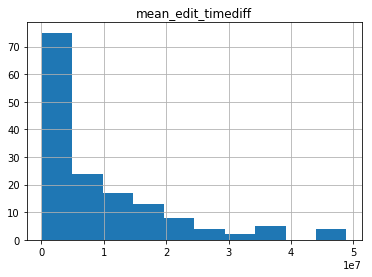

In [193]:
task5_m1_good.hist(column='mean_edit_timediff')

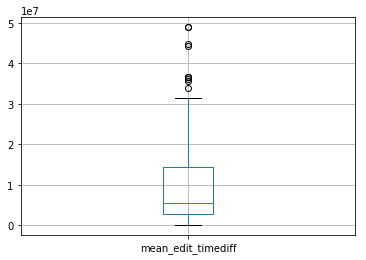

In [199]:
task5_m1_good.boxplot(column='mean_edit_timediff')

In [200]:
## Let's compare with the anther group

{'whiskers': [<matplotlib.lines.Line2D at 0x29ef8680a58>,
 'caps': [<matplotlib.lines.Line2D at 0x29ef8688358>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ef8680908>,
 'medians': [<matplotlib.lines.Line2D at 0x29ef8688ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x29ef8688fd0>,
 'means': []}

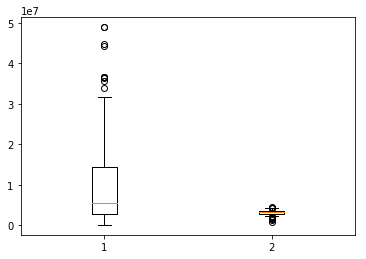

In [216]:
task5_nsgood = pd.DataFrame(articles_nsgood.groupby('Article').agg('timestamp').unique())
task5_m1_nsgood = pd.DataFrame([{"Article": row.name, 'mean_edit_timediff': measure_freq(row.name, task5_nsgood)} for index, row in task5_nsgood.iterrows()])
plt.boxplot([task5_m1_good['mean_edit_timediff'], task5_m1_nsgood['mean_edit_timediff']])